## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import utils_13 as utils

%load_ext autoreload
%autoreload 2

## 01-02 Data Loading

In [36]:
cs = utils.CollegeScorecard()

In [6]:
cs.univers.iloc[:5, :5]

,OPEID6,INSTNM,CITY,STABBR,ADM_RATE
0,1002,Alabama A & M University,Normal,AL,0.8965
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060
2,25034,Amridge University,Montgomery,AL,NaN
3,1055,University of Alabama in Huntsville,Huntsville,AL,0.7711
4,1005,Alabama State University,Montgomery,AL,0.9888


In [7]:
cs.univers.columns

Index(['OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ADM_RATE', 'NPT4_PUB',
       'NPT4_PRIV', 'NPT41_PUB', 'NPT45_PUB', 'NPT41_PRIV', 'NPT45_PRIV',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'MD_EARN_WNE_P10', 'C100_4',
       'FTFTPCTPELL'],
      dtype='object')

In [8]:
cs.fields.head()

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


## 03 Questions about the Data

In [46]:
cs = utils.CollegeScorecard()

### 01 What state has the greatest number of universities in this database?

In [41]:
cs.univers[cs.state_col].value_counts().head()

STABBR
CA    705
NY    450
TX    429
FL    394
PA    345
Name: count, dtype: int64

### 02 What city, in which state, has the greatest number of universities in this database?

In [43]:
cs.univers.groupby([cs.city_col, cs.state_col]).size().sort_values(ascending=False).head()

CITY         STABBR
New York     NY        81
Chicago      IL        70
Houston      TX        66
Los Angeles  CA        52
Brooklyn     NY        51
dtype: int64

### 03 Create a histogram showing how many bachelor programs universities offer

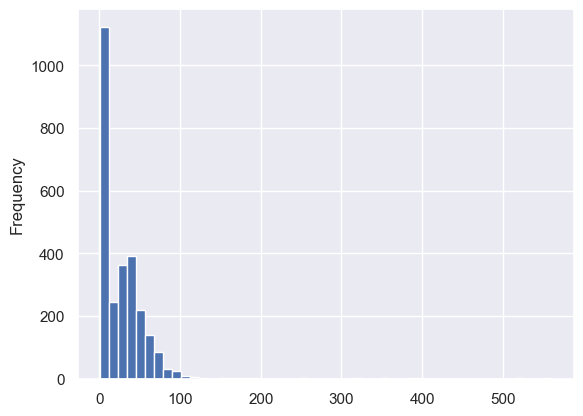

In [73]:
bachelors = cs.fields[cs.fields[cs.fields_degree_col] == 'Bachelors Degree']
bachelors_grouped = bachelors.groupby(cs.id_col).size()
bachelors_grouped.plot(kind='hist', bins=50);

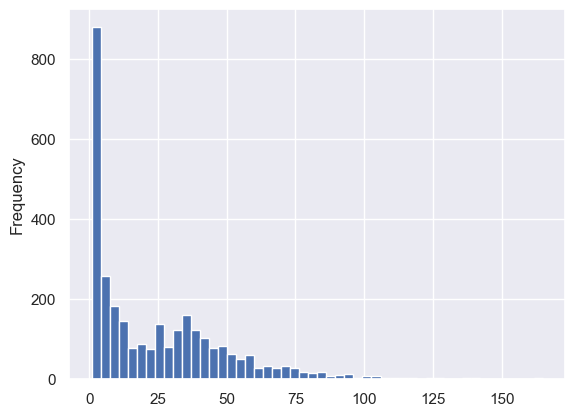

In [80]:
bachelors2 = (cs.fields
    .loc[cs.fields['CREDDESC'] == 'Bachelors Degree']
    .groupby(cs.name_col)['CIPDESC'].count()
    );
bachelors2.plot(kind='hist', bins=50);

#### DEBUGGING

In [87]:
cs.univers.shape

(6662, 16)

In [89]:
cs.univers[cs.id_col].nunique(), cs.univers[cs.name_col].nunique()

(5252, 6530)

In [99]:
# Create a mapping of ID to Name to see if there are duplicates
id_to_name = {}
for _, row in cs.univers.iterrows():
    id, name = row[cs.id_col], row[cs.name_col]
    if id in id_to_name:
        id_to_name[id].append(row[cs.name_col])
    else:
        id_to_name[id] = [row[cs.name_col]]

# Find IDs with multiple names
duplicates = {id: names for id, names in id_to_name.items() if len(names) > 1}
list(duplicates.items())[0]  # Show first 5 duplicates

(13039,
 ['South University-Montgomery',
  'South University-West Palm Beach',
  'South University-Savannah',
  'South University-Columbia',
  'South University-Tampa',
  'South University-Richmond',
  'South University-Virginia Beach',
  'South University-Savannah Online',
  'South University-Austin',
  'South University-High Point'])

### 04 Determine which university offers the greatest number of bachelor programs

In [100]:
cs.fields.head()

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


In [102]:
bachelors = cs.fields[cs.fields[cs.fields_degree_col] == 'Bachelors Degree']
bachelors[cs.id_col].value_counts().sort_values(ascending=False).head()

OPEID6
3329     560
3100     518
1417     402
20988    385
4057     355
Name: count, dtype: int64

In [103]:
bachelors[cs.name_col].value_counts().sort_values(ascending=False).head()

INSTNM
Westminster College                          165
Pennsylvania State University-Main Campus    141
University of Washington-Seattle Campus      137
Ohio State University-Main Campus            126
Bethel University                            125
Name: count, dtype: int64

In [105]:
id_to_name[3329][:5]  # Show first 5 names for ID 3329

['The Pennsylvania State University',
 'Pennsylvania State University-Dickinson Law',
 'Pennsylvania State University-World Campus',
 'Pennsylvania State University-College of Medicine',
 'Pennsylvania State University-Penn State Lehigh Valley']

### 05 Create a histogram showing how many graduate (master’s and doctoral) programs universities offer

In [106]:
cs.fields[cs.fields_degree_col].unique()

array(['Bachelors Degree', "Master's Degree", 'Doctoral Degree',
       'Graduate/Professional Certificate', 'First Professional Degree',
       'Undergraduate Certificate or Diploma', "Associate's Degree",
       'Post-baccalaureate Certificate'], dtype=object)

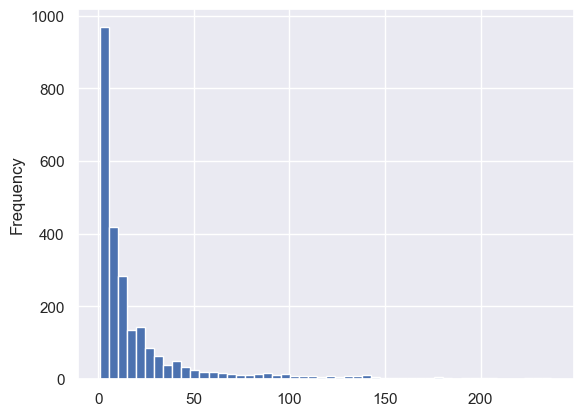

In [108]:
mask = cs.fields[cs.fields_degree_col].isin(['Master\'s Degree', 'Doctoral Degree'])
grad_programs = cs.fields[mask]
grad_programs_grouped = grad_programs.groupby(cs.name_col).size()
grad_programs_grouped.plot(kind='hist', bins=50);

### 06 Determine which university offers the greatest number of different graduate (master + doctoral) programs.

In [109]:
grad_programs_grouped.sort_values(ascending=False).head()

INSTNM
University of Washington-Seattle Campus      237
Pennsylvania State University-Main Campus    230
New York University                          226
University of Minnesota-Twin Cities          205
Ohio State University-Main Campus            200
dtype: int64

## 04 More questions about the Data

### 01 How many universities offer bachelor’s degrees but not master’s or doctorates?

In [120]:
cs.fields.head()

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


In [129]:
# Extract universities that offer undergraduate programs
undegrad_mask = cs.fields[cs.fields_degree_col] == 'Bachelors Degree'
undergrad_univs = cs.fields[undegrad_mask][cs.name_col].unique()

# Convert to set to get unique program counts
undergrad_univs = set(undergrad_univs)

# Extract universities that offer graduate programs
grad_mask = cs.fields[cs.fields_degree_col].isin(['Master\'s Degree', 'Doctoral Degree'])
grad_univs = cs.fields[grad_mask][cs.name_col].unique()

# Convert to set to get unique program counts
grad_univs = set(grad_univs)

# Find universities that offer only undergraduate programs
only_undergrad_univs = undergrad_univs - grad_univs
len(only_undergrad_univs)

923

#### DEBUGGING

In [132]:
cs = utils.CollegeScorecard()
undergrad_univs = cs.undergrad_univers_set
grad_univs = cs.grad_univers_set
only_undergrad_univs = undergrad_univs - grad_univs
len(only_undergrad_univs)

923

### 02 How many universities offer master’s and doctoral degrees but not bachelor’s?

In [114]:
# Find universities that offer graduate programs but not undergraduate programs
only_grad_univs = grad_univs - undergrad_univs
len(only_grad_univs)

404

#### DEBUGGING

In [133]:
cs = utils.CollegeScorecard()
undergrad_univs = cs.undergrad_univers_set
grad_univs = cs.grad_univers_set
only_grad_univs = grad_univs - undergrad_univs
len(only_grad_univs)

404

### 03 How many institutions offer bachelor’s degrees whose name contains the term “Computer Science”?

In [134]:
cs = utils.CollegeScorecard()

In [136]:
cs.undergrad_univers.head()

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
5,1002,Alabama A & M University,Public,Plant Sciences.,Bachelors Degree
6,1002,Alabama A & M University,Public,"Agriculture, Agriculture Operations, and Relat...",Bachelors Degree


In [139]:
# Degree programs containing "Computer Science"
mask_computer_science = cs.undergrad_univers[cs.fields_program_col].str.contains("Computer Science", case=False, na=False)

# Undegrad universities with "Computer Science" programs
cs_undergrad = cs.undergrad_univers[mask_computer_science]

# Number of unique institutions offering bachelor's degrees in "Computer Science"
cs_undergrad[cs.name_col].nunique()

762

### 04 The CONTROL field describes the types of institutions in the database. How many of each type offer a computer science program

In [140]:
cs.undergrad_univers[cs.fields_type_col].unique()

array(['Public', 'Private, nonprofit', 'Private, for-profit', 'Foreign'],
      dtype=object)

In [141]:
cs_undergrad.groupby(cs.fields_type_col).size()

CONTROL
Foreign                 32
Private, for-profit     18
Private, nonprofit     501
Public                 273
dtype: int64

## 05 Create a pie chart showing the different types of institutions that offer CS degrees

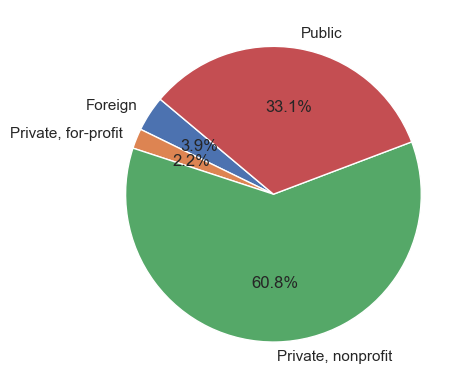

In [143]:
cs_undergrad.groupby(cs.fields_type_col).size().plot(kind='pie', autopct='%1.1f%%', startangle=140);

## 06 Determine the minimum, median, mean, and maximum tuitions for an undergrad CS degree

In [155]:
cs = utils.CollegeScorecard()

In [174]:
cs.get_cs_tuition_stats()

count      860.000000
mean     28992.582558
std      14976.784293
min       3154.000000
25%      16600.000000
50%      27238.000000
75%      39156.000000
max      61671.000000
Name: TUITIONFEE_OUT, dtype: float64

## 08 Determine the correlation between admission rate and tuition cost

In [177]:
cs = utils.CollegeScorecard()

In [178]:
# Determine the correlation between admission rate and tuition cost.
cs.univers[[cs.admission_rate_col, cs.tuition_out_col]].corr()

,ADM_RATE,TUITIONFEE_OUT
ADM_RATE,1.000000,-0.309658
TUITIONFEE_OUT,-0.309658,1.000000


## 09 Create a scatter plot 

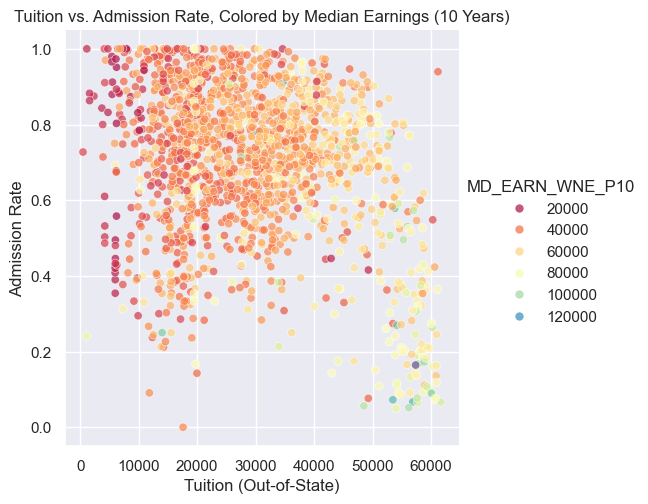

In [179]:
# Create a scatter plot with tuition on the x axis, admission rate on the y axis, and
# median earnings after 10 years are used for colorizing. Use the “Spectral” color-
# map. Where do the lowest-paid graduates show up on the graph?
cs = utils.CollegeScorecard()
cs.plot_tuition_admission_earnings()